In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 fro

In [24]:
df = pd.read_csv('6.2_airline_passengers.csv')

In [25]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                      144 non-null object
Thousands of Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [27]:
df['Month'] = pd.to_datetime(df['Month'])

In [28]:
df.set_index('Month',inplace = True)

In [29]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
date_min = df.index.min()
date_max = df.index.max()

In [33]:
print(date_min)
print(date_max)

1949-01-01 00:00:00
1960-12-01 00:00:00


In [34]:
total_period_mths = ((date_max.year - date_min.year)*12 + (date_max.month - date_min.month)) + 1

In [35]:
#number of rows
len(df.index)

144

In [36]:
if total_period_mths == len(df.index):
    print("No Missing period")

No Missing period


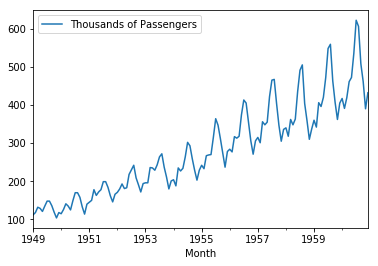

In [37]:
df.plot()

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df,freq=12)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 432x288 with 0 Axes>

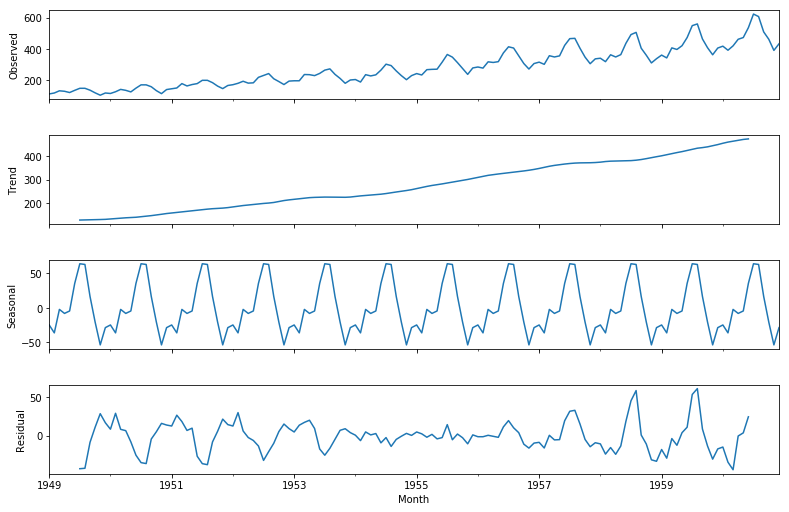

In [39]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12,8)
fig.show()

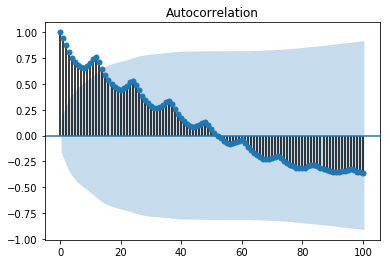

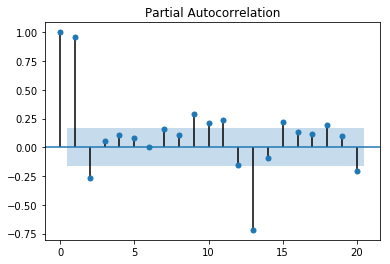

In [54]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df['Thousands of Passengers'],lags = 100,alpha=0.05);
plot_pacf(df['Thousands of Passengers'],lags=20,alpha=0.05);

In [45]:
from statsmodels.tsa.stattools import adfuller

In [46]:
adfuller(df['Thousands of Passengers'])

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [47]:
df['Seasonal Diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [49]:
adfuller(df['Seasonal Diff'].dropna())

(-3.3830207264924805,
 0.011551493085514982,
 1,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 919.527129208137)

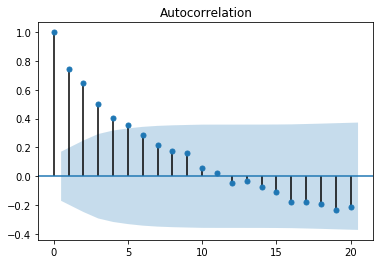

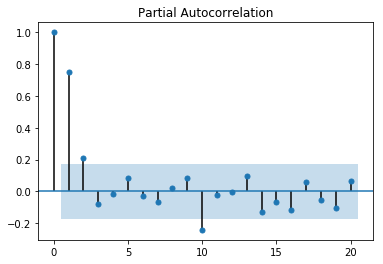

In [50]:
plot_acf(df['Seasonal Diff'].dropna(),lags=20,alpha=0.05);
plot_pacf(df['Seasonal Diff'].dropna(),lags=20,alpha=0.05);

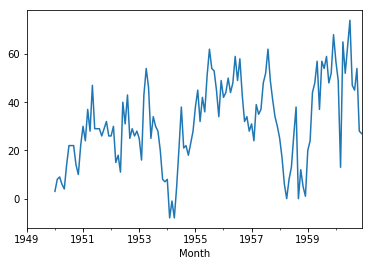

In [51]:
df['Seasonal Diff'].plot()

## Estimation

In [52]:
df.index.freq = 'MS'
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'],order=(1,0,0),seasonal_order=(2,0,0,12))
results = model.fit()
print(results.summary())

C:\Users\singl\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\singl\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                 
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -577.373
Date:                            Mon, 16 Dec 2019   AIC                           1162.746
Time:                                    17:27:15   BIC                           1174.625
Sample:                                01-01-1949   HQIC                          1167.573
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9631      0.018     52.217      0.000       0.927       0.999
ar.S.L12       0.8210      0.095   

In [55]:
df.index.freq = 'MS'
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'],order=(0,0,0),seasonal_order=(2,1,0,12))
results = model.fit()
print(results.summary())

                              Statespace Model Results                             
Dep. Variable:     Thousands of Passengers   No. Observations:                  144
Model:                SARIMAX(2, 1, 0, 12)   Log Likelihood                -596.915
Date:                     Mon, 16 Dec 2019   AIC                           1199.830
Time:                             17:33:08   BIC                           1208.478
Sample:                         01-01-1949   HQIC                          1203.344
                              - 12-01-1960                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.4405      0.071      6.207      0.000       0.301       0.580
ar.S.L24       0.4396      0.079      5.597      0.000       0.286       0.594
sigma2      

## 17th December 2019

In [1]:
import numpy as np

In [37]:
a = np.array([1,2,3,4,5,6,7,8,9,10])

In [38]:
#Q1: Change giving a condition
a[a%2==0]

array([ 2,  4,  6,  8, 10])

In [39]:
#Q2: Without Changing the original array
np.where(a%2==0,100,a)

array([  1, 100,   3, 100,   5, 100,   7, 100,   9, 100])

In [40]:
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [42]:
#Q3: changing the array
a[a%2==0]=100
a

array([  1, 100,   3, 100,   5, 100,   7, 100,   9, 100])

In [43]:
a.reshape(5,2)

array([[  1, 100],
       [  3, 100],
       [  5, 100],
       [  7, 100],
       [  9, 100]])

In [73]:
b = np.arange(12)

In [74]:
b = b.reshape(3,4)

In [75]:
c = np.arange(16)

In [76]:
c = c.reshape(4,4)

In [78]:
np.concatenate((b,c),axis=0)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [80]:
d = np.arange(12,20)

In [82]:
d.shape = (2,4)

In [84]:
e = np.arange(22,30)
e.shape = (2,4)

In [85]:
np.concatenate((d,e),axis=1)

array([[12, 13, 14, 15, 22, 23, 24, 25],
       [16, 17, 18, 19, 26, 27, 28, 29]])

In [88]:
#Q4
np.hstack((d,e))

array([[12, 13, 14, 15, 22, 23, 24, 25],
       [16, 17, 18, 19, 26, 27, 28, 29]])

In [89]:
np.vstack((d,e))

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [22, 23, 24, 25],
       [26, 27, 28, 29]])

In [92]:
aa = np.array([1,2,3])

In [102]:
#Q5: Generate custom sequences in numpy without hardcoding?
np.concatenate((np.repeat(aa,3),np.tile(aa,3)))

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

In [105]:
#Q6: How to get common items
np.intersect1d(np.arange(10),np.random.randint(6,10,10))

array([6, 7, 8, 9])

In [107]:
#Q7: Remove from one array those elements those items that exist in another?
np.setdiff1d(np.arange(10),np.random.randint(6,10,10))

array([0, 1, 2, 3, 4, 5, 7])

In [113]:
#Q8: How to get positions where elements of two arrays match?
a= np.arange(10)
b= np.array([0,2,2,4,4,5,5,6,7,8])
np.where(a==b)

(array([0, 2, 4, 5], dtype=int64),)

In [124]:
#Q9: Print only 3 decimal places in python numpy array
np.set_printoptions(precision=3)
np.random.randn(15)

#supress can be used to show all numbers as float including 0 or like 0.23

array([-0.494,  0.314,  0.018,  1.136,  1.892, -0.986, -0.768, -0.675,
        0.237, -2.412, -1.795,  1.497,  1.18 ,  1.316, -1.535])

In [125]:
np.array([1.23456])

array([1.235])

In [128]:
#Q10: How to rank items in an array using Numpy?
np.argsort(np.array([43,55,1,88,9]))

array([2, 4, 0, 1, 3], dtype=int64)

In [132]:
#Q10: Euclidean distance between 2 arrays?
a= np.arange(10)
b= np.array([0,2,2,4,4,5,5,6,7,8])
np.linalg.norm(a-b)

2.449489742783178

## From File HPI Master

In [133]:
import pandas as pd

In [134]:
df = pd.read_csv('C1_HPI_master.csv')

In [135]:
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,101.03,101.11
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.40,101.08
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.79,101.10
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.44,101.50


In [145]:
df1 = df['index_nsa'].groupby(df['yr']).mean()

In [153]:
df1.sort_values(ascending=False)[:1]

yr
2007    224.845242
Name: index_nsa, dtype: float64

In [154]:
import matplotlib.pyplot as plt

In [155]:
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,101.03,101.11
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.40,101.08
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.79,101.10
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.44,101.50


In [165]:
import seaborn as sns

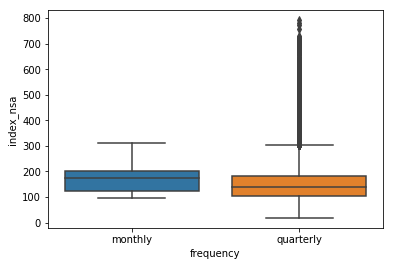

In [166]:
sns.boxplot(x='frequency',y='index_nsa',data=df)

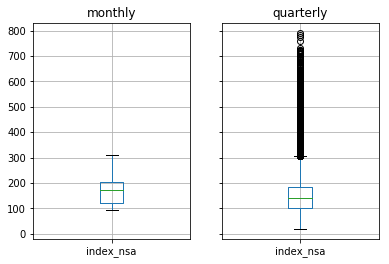

In [181]:
# df.plot(type='box',columns='index_nsa',by='frequency')
df.groupby('frequency').boxplot(column='index_nsa')
plt.show()

In [182]:
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,101.03,101.11
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.40,101.08
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.79,101.10
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.44,101.50


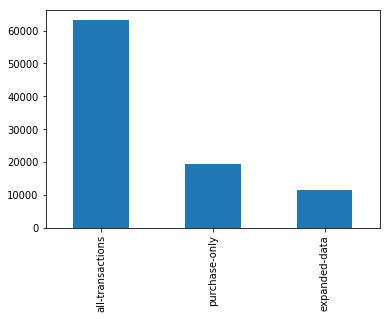

In [186]:
df[df['hpi_type'] == 'traditional']['hpi_flavor'].value_counts().plot(kind='bar')